# What is the probability that a player who always hits until reaching 17 or higher will win a game of blackjack against a dealer who follows the same rule?

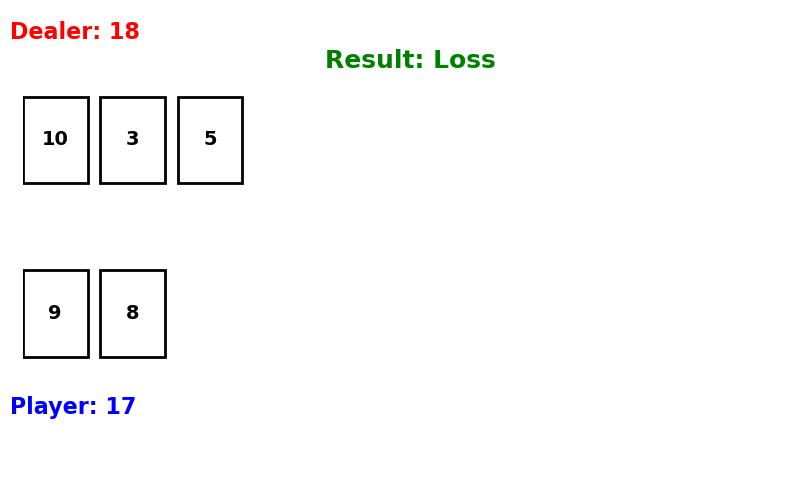

In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output, display
import time

# --- Blackjack logic ---
def draw_card():
    return random.choice(["A",2,3,4,5,6,7,8,9,10,10,10,10])

def hand_value(hand):
    total = 0
    aces = 0
    for card in hand:
        if card == "A":
            total += 11
            aces += 1
        else:
            total += card
    while total > 21 and aces > 0:
        total -= 10
        aces -= 1
    return total

def simulate_round():
    player = [draw_card(), draw_card()]
    dealer = [draw_card(), draw_card()]

    while hand_value(player) < 17:
        player.append(draw_card())

    if hand_value(player) <= 21:
        while hand_value(dealer) < 17:
            dealer.append(draw_card())

    # Determine outcome
    p_total = hand_value(player)
    d_total = hand_value(dealer)
    if p_total > 21:
        outcome = "Loss"
    elif d_total > 21:
        outcome = "Win"
    elif p_total > d_total:
        outcome = "Win"
    elif p_total < d_total:
        outcome = "Loss"
    else:
        outcome = "Push"

    return player, dealer, outcome

# --- Visualization ---
def draw_cards(player, dealer, outcome):
    clear_output(wait=True)
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 8)
    ax.axis('off')
    
    # Dealer cards
    for i, card in enumerate(dealer):
        rect = patches.Rectangle((i*1.2, 5), 1, 1.5, linewidth=2, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
        ax.text(i*1.2+0.5, 5.75, str(card), ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Player cards
    for i, card in enumerate(player):
        rect = patches.Rectangle((i*1.2, 2), 1, 1.5, linewidth=2, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
        ax.text(i*1.2+0.5, 2.75, str(card), ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Scores
    ax.text(-0.2, 7.5, f"Dealer: {hand_value(dealer)}", fontsize=16, fontweight='bold', color='red')
    ax.text(-0.2, 1, f"Player: {hand_value(player)}", fontsize=16, fontweight='bold', color='blue')
    
    # Outcome
    ax.text(6, 7, f"Result: {outcome}", fontsize=18, fontweight='bold', color='green', ha='center')
    
    display(fig)
    plt.close(fig)
    time.sleep(1)  # pause so you can see each round

# --- Run multiple rounds ---
rounds = 5
for _ in range(rounds):
    player, dealer, outcome = simulate_round()
    draw_cards(player, dealer, outcome)


In [3]:
trials = 1000
results = {"Win":0, "Loss":0, "Push":0}

for _ in range(trials):
    player, dealer, outcome = simulate_round()
    results[outcome] += 1

# Compute probabilities
win_prob = results["Win"] / trials
loss_prob = results["Loss"] / trials
push_prob = results["Push"] / trials

print(f"Win probability: {win_prob:.2f}")
print(f"Loss probability: {loss_prob:.2f}")
print(f"Push probability: {push_prob:.2f}")


Win probability: 0.40
Loss probability: 0.49
Push probability: 0.10


Based on the simulation, a player using the “hit until 17” strategy wins approximately 40% of games, loses about 49%, and ties 10%. This shows that the player has less than a 50% chance of winning against the dealer with this strategy, giving the dealer a statistical advantage. The conclusion is supported by the probabilities calculated from 1000 simulation trials and the visual bar chart of outcomes.